# Visualization of AMSIMP & Benchmarking Experiments

This notebook will generate scatter plots of various profiles of the Earth's Troposphere and Stratosphere using AMSIMP. An example of such a profile would be plotting a ***Atmospheric Pressure - Altitude*** scatter plot based on the Barometric Pressure Formula. This notebook will also output the run time of AMSIMP using different levels of simulation detail. 

In [1]:
#Import dependencies.
import os
#Allows Jupyter Notebook to access the AMSIMP module on GitHub.
os.chdir(os.path.dirname(os.getcwd()))
#Import the rest of the dependencies.
import matplotlib.pyplot as plt
import amsimp

In [2]:
#Defines the level of detail for the notebook
detail = amsimp.Backend(3)

## Scatter Plots Generated from AMSIMP 

> Important Note: The formula for Coriolis force results in a Coriolis parameter of identically zero at the equator, and therefore, does not hold up. This, by extension, affects the zonal and meridional velocity calculations.

### Latitude - Zonal Velocity Scatter Plot (At Sea Level)

(-100, 100)

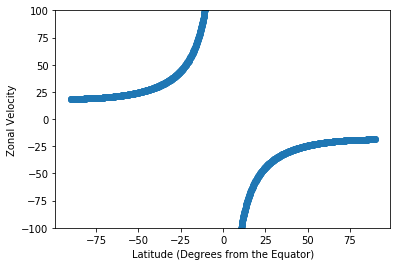

In [3]:
plt.scatter(detail.latitude_lines(), detail.zonal_velocity()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Zonal Velocity')
plt.ylim(-100, 100)

### Latitude - Meridional Velocity Scatter Plot (At Sea Level)

(-100, 100)

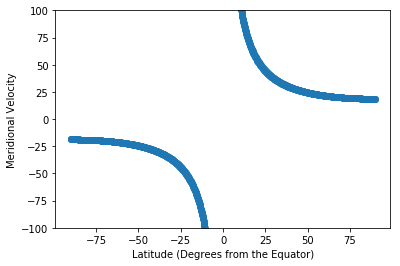

In [4]:
plt.scatter(detail.latitude_lines(), detail.meridional_velocity()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Meridional Velocity')
plt.ylim(-100, 100)

### Vertical Velocity - Altitude Scatter Plot

Text(0, 0.5, 'Height Above Sea Level (m)')

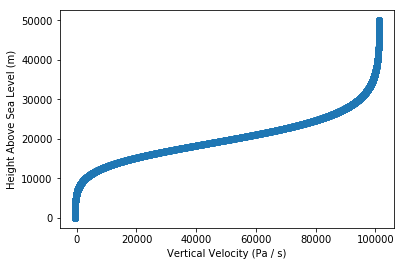

In [5]:
plt.scatter(detail.vertical_velocity(), detail.altitude_level())
plt.xlabel('Vertical Velocity (Pa / s)')
plt.ylabel('Height Above Sea Level (m)')

### Temperature - Altitude (Standard Atmosphere Calculation)

Text(0, 0.5, 'Height Above Sea Level (m)')

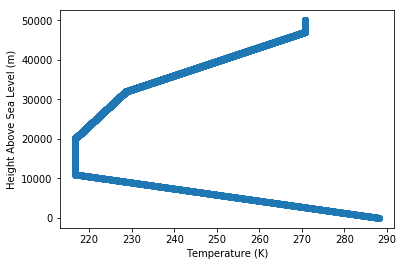

In [6]:
plt.scatter(detail.temperature(), detail.altitude_level())
plt.xlabel('Temperature (K)')
plt.ylabel('Height Above Sea Level (m)')

### Altitude - Atmospheric Pressure Scatter Plot (Barometric Formula)

Text(0, 0.5, 'Height Above Sea Level (m)')

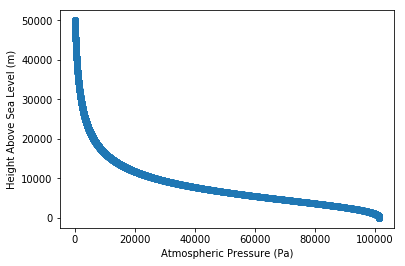

In [7]:
plt.scatter(detail.pressure(), detail.altitude_level())
plt.xlabel('Atmospheric Pressure (Pa)')
plt.ylabel('Height Above Sea Level (m)')

### Latitude - Coriolis Force Scatter Plot

Text(0, 0.5, 'Coriolis Force (Radians / s)')

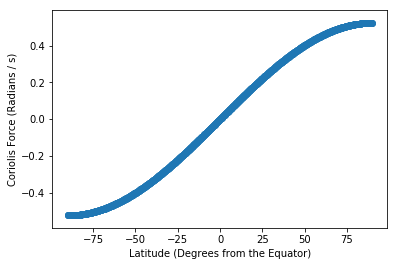

In [8]:
plt.scatter(detail.latitude_lines(), detail.coriolis_force())
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Coriolis Force (Radians / s)')

### Geopotential - Altitude Scatter Plot

Text(0, 0.5, 'Height Above Sea Level (m)')

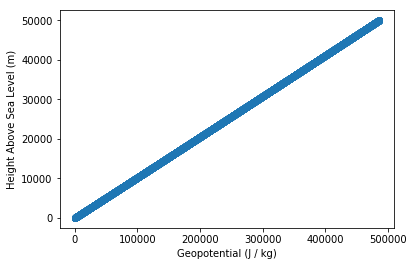

In [9]:
plt.scatter(detail.geopotential(), detail.altitude_level())
plt.xlabel('Geopotential (J / kg)')
plt.ylabel('Height Above Sea Level (m)')

### Latitude - Absolute Vorticity Scatter Plot

Text(0, 0.5, 'Absolute Vorticity (Radians / s)')

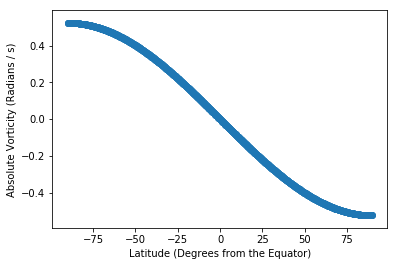

In [10]:
plt.scatter(detail.latitude_lines(), detail.absolute_vorticity())
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Absolute Vorticity (Radians / s)')

### Potential Temperature - Altitude Scatter PLot

Text(0, 0.5, 'Height Above Sea Level (m)')

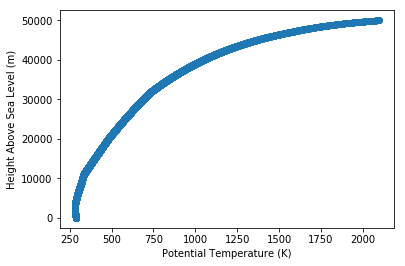

In [11]:
plt.scatter(detail.potential_temperature(), detail.altitude_level())
plt.xlabel('Potential Temperature (K)')
plt.ylabel('Height Above Sea Level (m)')